In [67]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [68]:
IMAGE_SIZE = [224, 224]

In [69]:
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [70]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [71]:
for layer in vgg.layers:
  layer.trainable = False

In [72]:
folders = glob('Datasets/Train/*')

In [73]:
x = Flatten()(vgg.output)

In [74]:
prediction = Dense(len(folders), activation='softmax')(x)

In [75]:
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [76]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [77]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1399 images belonging to 4 classes.
Found 6869 images belonging to 4 classes.


In [79]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HP\AppData\Local\Temp/ipykernel_2800/708679198.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
44/44 [==============================] - 2879s 67s/step - loss: 0.7903 - accuracy: 0.6883 - val_loss: 2.1650 - val_accuracy: 0.2431
Epoch 2/5
44/44 [==============================] - 2752s 64s/step - loss: 0.7603 - accuracy: 0.6955 - val_loss: 2.6494 - val_accuracy: 0.2390
Epoch 3/5
44/44 [==============================] - 2760s 64s/step - loss: 0.7780 - accuracy: 0.6769 - val_loss: 2.0016 - val_accuracy: 0.2402
Epoch 4/5
44/44 [==============================] - 2573s 60s/step - loss: 0.6786 - accuracy: 0.7470 - val_loss: 2.4134 - val_accuracy: 0.2463
Epoch 5/5
44/44 [==============================] - 2572s 60s/step - loss: 0.7259 - accuracy: 0.7119 - val_loss: 2.7046 - val_accuracy: 0.2345


In [84]:
model.save("my_model.h5")

In [85]:
from tensorflow import keras
model = keras.models.load_model(r'C:\Users\HP\VSCode Projects\AIproject\Transfer-Learning\my_model.h5')
model

In [86]:
model.predict(training_set)

44/44 [==============================] - 1007s 23s/step


array([[0.2375903 , 0.11060097, 0.27987644, 0.37193233],
       [0.06100791, 0.06376582, 0.11716716, 0.75805914],
       [0.12419269, 0.00382655, 0.025779  , 0.84620166],
       ...,
       [0.01279308, 0.906744  , 0.01915098, 0.06131187],
       [0.4729537 , 0.16014591, 0.05396804, 0.3129323 ],
       [0.42009962, 0.09970878, 0.20927401, 0.27091756]], dtype=float32)

In [87]:
model.fit(test_set)



































215/215 [==============================] - 8780s 41s/step - loss: 1.1007 - accuracy: 0.5580


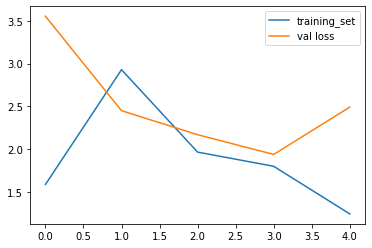

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='training_set')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

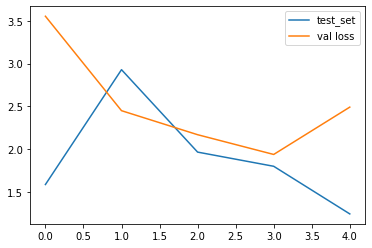

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='test_set')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')